# Gaussian Processes for Machine Learning

[link](https://sandipanweb.wordpress.com/2020/12/08/gaussian-process-regression-with-python/)



* GP = takes two parameters: the mean (m) and the kernel function (k)

* Given training data points (X,y) the goal is to learn a function f

* Then can use the function to predict the y value for unseen data points Xtest 

In [1]:
import numpy as np  
import pandas as pd
import pylab as pb 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score as ras 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF 

## Squared Exponential Kernel Formula 

The formula for the squared exponential kernel is: 
$$
k(x_1, x_2) := \sigma^2 \exp(-\frac{||x_1 - x_2||^2}{(2l^2)})
$$

with the lengthscale: $l > 0$ and the variance $\sigma^2 > 0$


## Creating Training Data

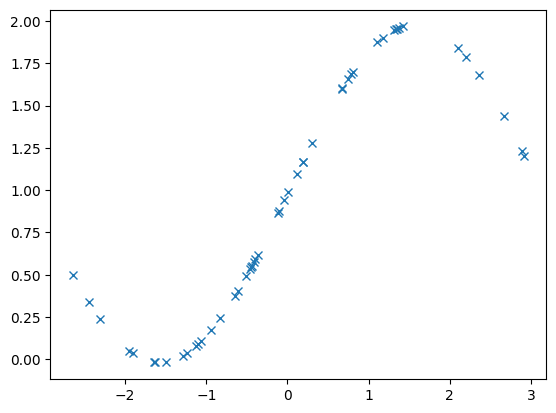

In [2]:

# Generate the data points 

def gen_points(n=10, var=2): 
    np.random.seed(123)
    # Generates a sample of x values from the uniform distribution
    X = np.random.uniform(-3, 3, n)[:, np.newaxis]
    # Evaluates y sample as the sin of X plus random Gaussian noise 
    y = np.sin(X[:,0]) + np.random.randn()
    return X, y

# Plotting the sample data points 

import matplotlib.pylab as plt 

# Generates the X and y points 
X, y = gen_points(50)


# Plots a scatter plot of the data
plt.plot(X[:, 0], y, 'x')
plt.show()



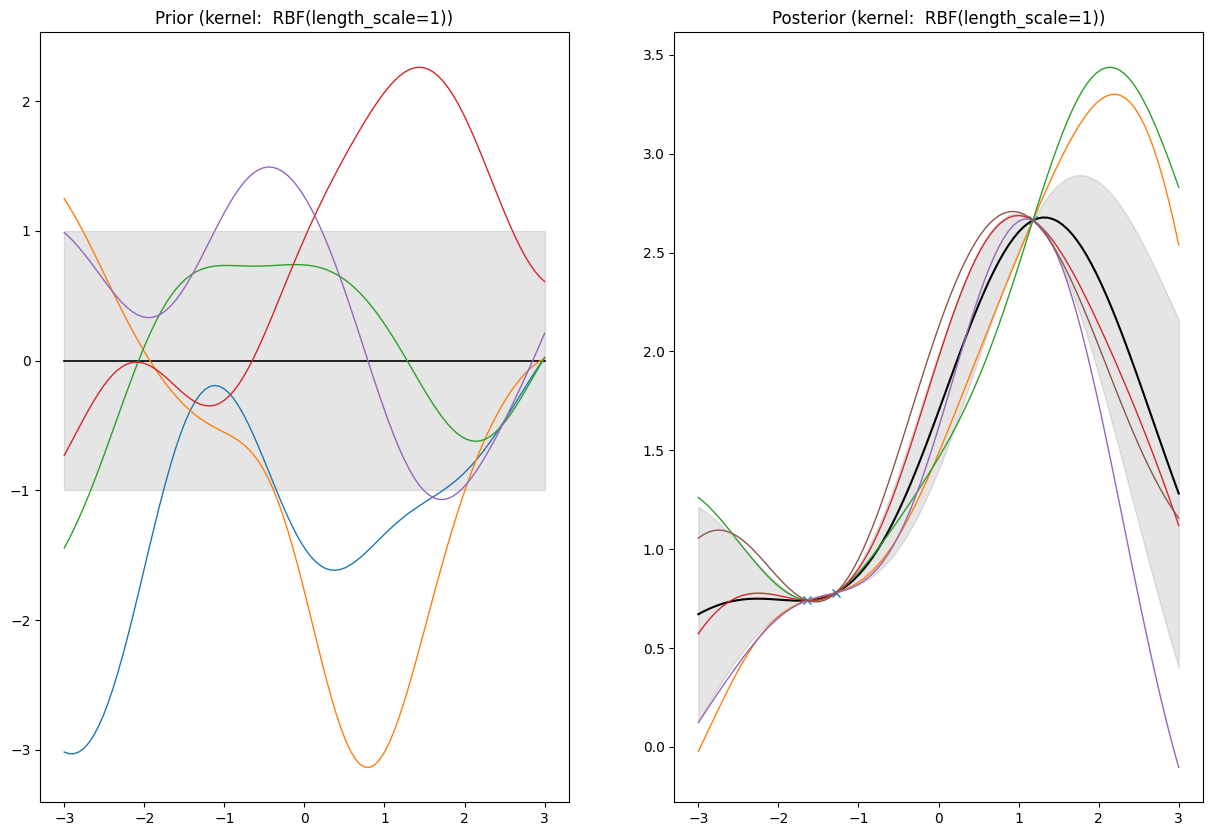

In [3]:
# Specify the kernel
kernel = RBF(length_scale=1, length_scale_bounds=(1e-1, 10))


# Fit GP 
# Random state attribute allows you to create reproducible results
gp = GaussianProcessRegressor(kernel=kernel, random_state=0)


# Create axis for plots 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))


# SAMPLING FROM THE PRIOR

# Creates a vector of x values 
x = np.linspace(-3, 3, 100)

# Predicts the y-values using GP model 
    # X = the points where the GP is evaluates 
    # return_std = boolean, if true returns the sandard deviation of the predictive distribution
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)

# Plots the mean line 
    # 'k' = specifies the colour as black 
ax[0].plot(x, y_mean, 'k', lw=1.2)


# Displays the error region as one sd above and below the mean
ax[0].fill_between(x, y_mean - y_std, y_mean + y_std,
                     alpha=0.1, color='k')

# Evaluates samples for the y value from the GPR for different X values     
    # Second value specifies the number of functions to sample
y_samples = gp.sample_y(x[:, np.newaxis], 5)

# Plots the sampled functions 
    # lw = the linewidth
ax[0].plot(x, y_samples, lw=1)

# Adds a title 
ax[0].set_title("Prior (kernel:  %s)" % kernel, fontsize=12)


# SAMPLING FROM THE POSTERIOR

n = 3

# Generate data and fit GP
X, y = gen_points(n)
gp.fit(X, y)

# Plot the posterior 
# Predicts y values using the posterior function distribution 
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)


# Plots the mean function of the posterior 
ax[1].plot(x, y_mean, 'k')

# Plots the data points 
plt.plot(X[:, 0], y,'x')

# Adds the error region 
ax[1].fill_between(x, y_mean - y_std, y_mean + y_std,
                     alpha=0.1, color='k')


# Samples function values from the postrior distribution 
y_samples = gp.sample_y(x[:, np.newaxis], 5)
plt.plot(x, y_samples, lw=1)

# Adds title 
ax[1].set_title("Posterior (kernel:  %s)" % kernel, fontsize=12)


plt.show()

## Hard Coding

In [29]:
# Define function to calculate se kernel value for two numbers 
def se_kernel(x1, x2, sigma = 1, l = 1): 
    return sigma*np.exp(- np.linalg.norm(x1 - x2)**2/(2*l**2))

# Define function to apply the se kernel function to a vector X
def apply_kernel(X, sigma = 1, l = 1):
    n = len(X)
    kernel = np.zeros((n, n))
    for i in range(n): 
        for j in range(n): 
            kernel[i, j] = se_kernel(X[i], X[j], sigma = sigma, l = l)
    return kernel




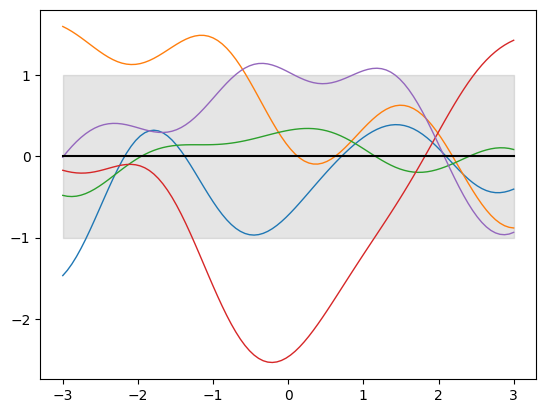

In [5]:
# Create a vector of x values 
x = np.linspace(-3, 3, 100)

# Generate the covariance matrix 
cov_matrix = apply_kernel(x)

# Create the axis for the plot
fig, ax = plt.subplots()

# Plots 5 sampled functions
for i in range(5):
    y = np.random.multivariate_normal(mean = np.zeros(100), cov=cov_matrix)
    ax.plot(x, y, lw=1)

# Adds the mean line 
ax.plot(x, [0]*100, 'k')

# Displays the error region as one sd above and below the mean
ax.fill_between(x,  - 1, 1,
                     alpha=0.1, color='k')



## Varying the sigma value

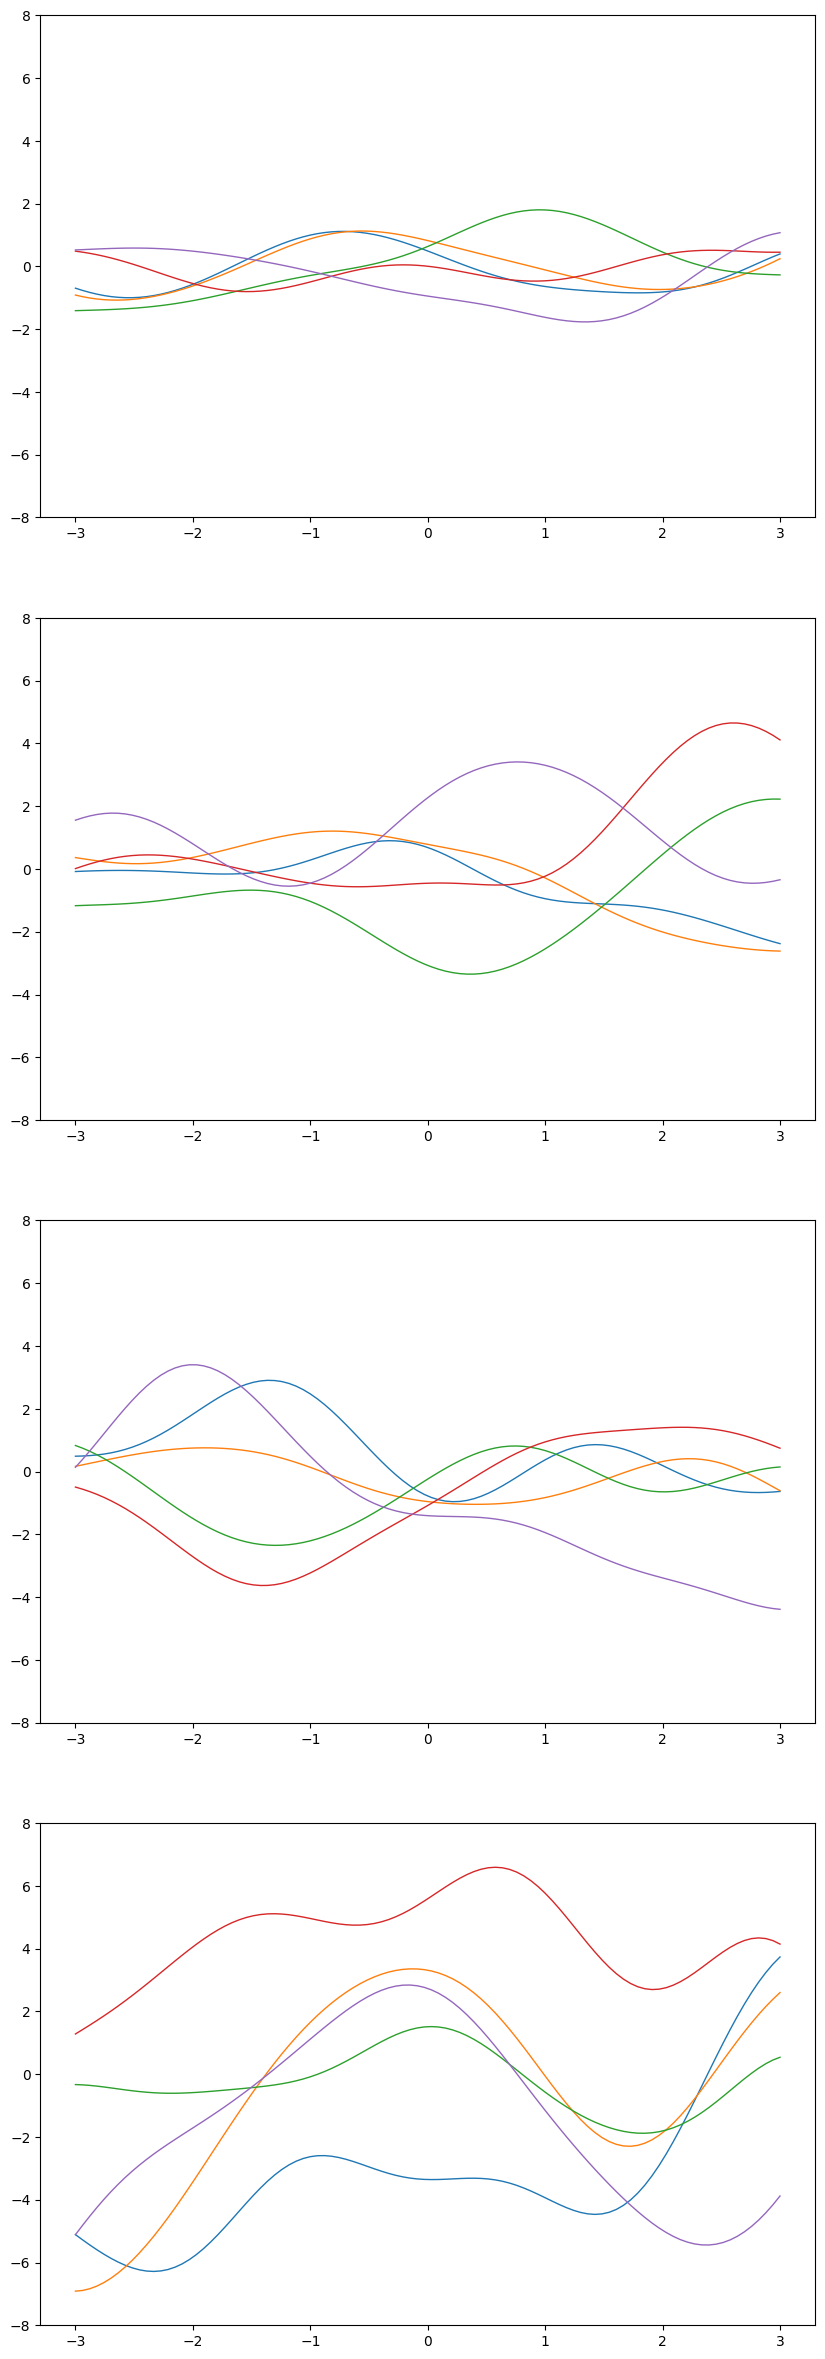

In [27]:
# Create a vector of x values 
x = np.linspace(-3, 3, 100)

sigmas = [1, 2, 3, 10]

# Create the axis for the plot
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,30))

for i in range(4):
    # Generate the covariance matrix 
    cov_matrix = apply_kernel(x, sigma = sigmas[i-1])

    # Plots 5 sampled functions
    for j in range(5):
        y = np.random.multivariate_normal(mean = np.zeros(100), cov=cov_matrix)
        ax[i-1].plot(x, y, lw=1)
        ax[i-1].set_ylim(-8, 8)



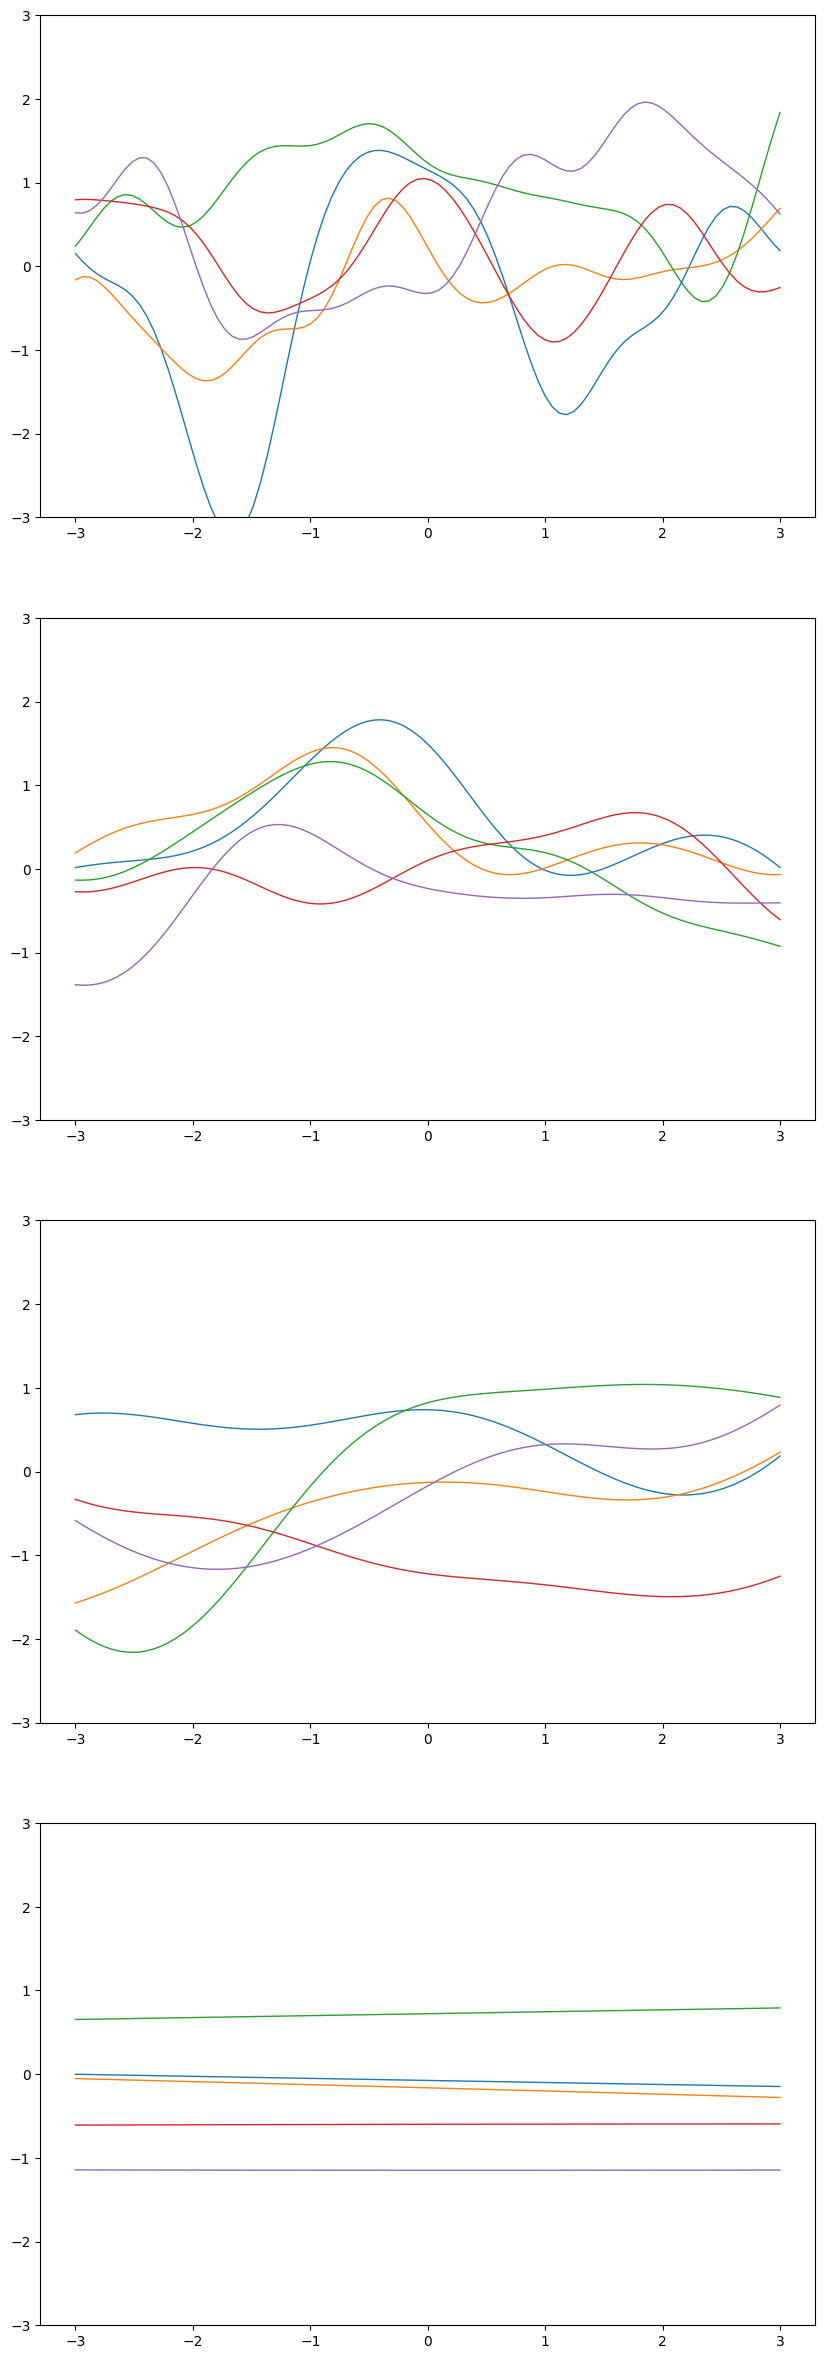

In [33]:
# Create a vector of x values 
x = np.linspace(-3, 3, 100)

l = [0.5, 1, 1.5, 50]

# Create the axis for the plot
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,30))

for i in range(4):
    # Generate the covariance matrix 
    cov_matrix = apply_kernel(x, l = l[i-1])

    # Plots 5 sampled functions
    for j in range(5):
        y = np.random.multivariate_normal(mean = np.zeros(100), cov=cov_matrix)
        ax[i-1].plot(x, y, lw=1)
        ax[i-1].set_ylim(-3, 3)
        
        